In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
df=pd.read_csv('pizza_data.csv')
df

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99
...,...,...,...,...,...
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,"X Large (16"")",$23.85
367,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Small (10"")",$11.80
368,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Medium (12"")",$14.95
369,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Large (14"")",$18.65


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     371 non-null    object
 1   Pizza Name  371 non-null    object
 2   Type        371 non-null    object
 3   Size        371 non-null    object
 4   Price       371 non-null    object
dtypes: object(5)
memory usage: 14.6+ KB


In [140]:
df.isnull().sum()

Company       0
Pizza Name    0
Type          0
Size          0
Price         0
dtype: int64

In [141]:
df.duplicated().sum()

0

In [142]:
df['Company'].value_counts()

Godfather's Pizza    133
Pizza Hut            126
Domino's Pizza        88
IMO's Pizza           24
Name: Company, dtype: int64

In [144]:
df.sample(5)

,Company,Pizza Name,Type,Size,Price
13,Domino's Pizza,Spinach & Feta (Brooklyn Style),Specialty Pizzas,"X-Large (16"")",$17.99
192,Pizza Hut,Cock-a-doodle Bacon™ (Hand-Tossed),New Recipe Pizzas,Medium,$12.49
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
99,Pizza Hut,Pepperoni Lover's® Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,$4.79
359,IMO's Pizza,All Meat Pizza,Specialty Pizzas,"Small (10"")",$12.70


In [145]:
df['Type'].value_counts()

Specialty Pizzas         186
Classic Recipe Pizzas     90
Feast Pizzas              33
New Recipe Pizzas         21
Cheese Pizza              16
Cheeses Pizza             10
Express Favorites          7
Skinny Pizzas              5
Gluten-Free Pizzas         3
Name: Type, dtype: int64

In [146]:
df['Size'].value_counts()

Large            111
Medium            84
Small (10")       39
Medium (12")      27
Large (14")       24
Small             20
Jumbo             18
X-Large (16")     16
Mini              14
Personal          12
X Large (16")      6
Name: Size, dtype: int64

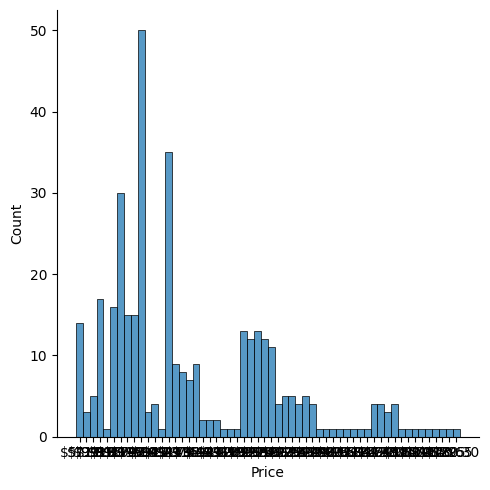

In [147]:
sns.displot(df['Price'])

In [148]:
df['Price']=df['Price'].str.replace('$','')

<ipython-input-148-7b7051402535>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


In [149]:
df['Price']=df['Price'].astype('float')

In [150]:
df.sample(5)

,Company,Pizza Name,Type,Size,Price
152,Pizza Hut,Chicken Supreme Pizza (Hand-Tossed),Classic Recipe Pizzas,Large,16.49
344,Godfather's Pizza,"Original, Golden or Thin Crust",Express Favorites,Large,18.69
120,Pizza Hut,Ultimate Cheese Lover's Pizza (Thin N Crispy),Classic Recipe Pizzas,Medium,12.49
197,Pizza Hut,Pretzel Piggy™ (Hand-Tossed),New Recipe Pizzas,Large,15.49
43,Domino's Pizza,Fiery Hawaiian™ (Brooklyn Style),Specialty Pizzas,"X-Large (16"")",17.99


In [154]:
df['Size']=df['Size'].str.replace('Personal','Mini')
df['Size']=df['Size'].apply(lambda x:'Small' if 'Small' in x else x)
df['Size']=df['Size'].apply(lambda x:'Medium' if 'Medium' in x else x)
df['Size']=df['Size'].apply(lambda x:'Jumbo' if 'X' in x else x)
df['Size']=df['Size'].apply(lambda x:'Large' if 'Large (14")' in x else x)


In [155]:
df['Size'].value_counts()

Large     135
Medium    111
Small      59
Jumbo      40
Mini       26
Name: Size, dtype: int64

In [156]:
df['Size']=df['Size'].str.replace('Mini','1')
df['Size']=df['Size'].str.replace('Small','2')
df['Size']=df['Size'].str.replace('Medium','3')
df['Size']=df['Size'].str.replace('Large','4')
df['Size']=df['Size'].str.replace('Jumbo','5')

In [157]:
df['Size']=df['Size'].astype('int32')

In [158]:
df.corr()['Price']

<ipython-input-158-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Size     0.662639
Price    1.000000
Name: Price, dtype: float64

In [159]:
df.sample(5)

,Company,Pizza Name,Type,Size,Price
170,Pizza Hut,Hawaiian Luau (Hand-Tossed),Classic Recipe Pizzas,4,15.49
91,Pizza Hut,Pan Pizza,Cheese Pizza,3,8.49
48,Domino's Pizza,Buffalo Chicken (Brooklyn Style),Specialty Pizzas,5,17.99
192,Pizza Hut,Cock-a-doodle Bacon™ (Hand-Tossed),New Recipe Pizzas,3,12.49
298,Godfather's Pizza,Super Hawaiian Pizza (Mozza-Loaded Crust),Specialty Pizzas,3,22.49


In [160]:
df['Type'].value_counts()

Specialty Pizzas         186
Classic Recipe Pizzas     90
Feast Pizzas              33
New Recipe Pizzas         21
Cheese Pizza              16
Cheeses Pizza             10
Express Favorites          7
Skinny Pizzas              5
Gluten-Free Pizzas         3
Name: Type, dtype: int64

In [161]:
df['Type']=df['Type'].str.replace('Cheeses','Cheese')

In [162]:
top_pizza_type=df['Type'].value_counts().nlargest(5).index

In [163]:
df['Type']=df['Type'].where(df['Type'].isin(top_pizza_type),'others')

In [164]:
df.sample(5)

,Company,Pizza Name,Type,Size,Price
148,Pizza Hut,BBQ Lover's™ (Thin N Crispy),Classic Recipe Pizzas,4,15.49
13,Domino's Pizza,Spinach & Feta (Brooklyn Style),Specialty Pizzas,5,17.99
6,Domino's Pizza,Crunchy Thin Crust,Cheese Pizza,4,9.99
179,Pizza Hut,Super Supreme Pizza (Hand-Tossed),Classic Recipe Pizzas,4,16.49
352,IMO's Pizza,Veggie Pizza,Specialty Pizzas,3,16.20


In [165]:
df['Type'].value_counts()

Specialty Pizzas         186
Classic Recipe Pizzas     90
Feast Pizzas              33
Cheese Pizza              26
New Recipe Pizzas         21
others                    15
Name: Type, dtype: int64

In [166]:
import re

In [167]:

df['Veg Pizza']=df['Pizza Name'].apply(lambda x:1 if 'Veggie' in x else 0)

In [168]:
df.sample(10)

,Company,Pizza Name,Type,Size,Price,Veg Pizza
245,Godfather's Pizza,"Classic Combo Pizza (Original, Golden or Thin ...",Specialty Pizzas,4,23.99,0
368,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,3,14.95,0
209,Pizza Hut,Skinny With A Kick™ (Skinny Slice),others,4,15.49,0
365,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,4,19.20,0
292,Godfather's Pizza,Super Combo Pizza (Mozza-Loaded Crust),Specialty Pizzas,3,22.49,0
222,Godfather's Pizza,All-Meat Combo Pizza (Original or Golden Crust),Specialty Pizzas,2,15.99,0
127,Pizza Hut,Veggie Lover's® Pizza (Pan Pizza),Classic Recipe Pizzas,3,12.49,1
240,Godfather's Pizza,Taco Pie Pizza (Original or Thin Crust),Specialty Pizzas,5,27.99,0
293,Godfather's Pizza,"Super Combo Pizza (Original, Golden or Thin Cr...",Specialty Pizzas,4,25.99,0
30,Domino's Pizza,Pacific Veggie (Hand Tossed or Thin Crust),Specialty Pizzas,2,11.99,1


In [169]:
df.corr()['Price']

<ipython-input-169-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Size         0.662639
Price        1.000000
Veg Pizza    0.078206
Name: Price, dtype: float64

In [179]:
df['Pizza Name'].value_counts().nlargest(60)

Egg-Ceptional Pizza                                                  4
BBQ Chicken Pizza                                                    4
All Meat Pizza                                                       4
Cheese Pizza                                                         4
Veggie Pizza                                                         4
Deluxe Pizza                                                         4
Chipotle Chicken and Bacon Pizza (Original, Golden or Thin Crust)    4
BBQ Bacon Cheeseburger Pizza (Original, Golden or Thin Crust)        4
BBQ Lover's™ (Pan Pizza)                                             3
Meat Lover's® Pizza (Pan Pizza)                                      3
Ultimate Cheese Lover's Pizza (Pan Pizza)                            3
Veggie Lover's® Pizza (Pan Pizza)                                    3
Supreme Pizza (Pan Pizza)                                            3
Super Supreme Pizza (Pan Pizza)                                      3
Chicke

In [171]:
df['Thin Pizza']=df['Pizza Name'].apply(lambda x:1 if 'Thin' in x else 0)

In [186]:
df.corr()['Price']

<ipython-input-186-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Size             0.662639
Price            1.000000
Veg Pizza        0.078206
Thin Pizza       0.209707
Non Veg Pizza    0.024536
Name: Price, dtype: float64

In [182]:
df['Non Veg Pizza']=df['Pizza Name'].apply(lambda x:1 if 'Chicken' in x else 0)


In [184]:
df=df.drop(['Pizza Name'],axis=1)

In [185]:
df

,Company,Type,Size,Price,Veg Pizza,Thin Pizza,Non Veg Pizza
0,Domino's Pizza,Cheese Pizza,2,5.99,0,0,0
1,Domino's Pizza,Cheese Pizza,3,7.99,0,0,0
2,Domino's Pizza,Cheese Pizza,4,9.99,0,0,0
3,Domino's Pizza,Cheese Pizza,3,7.99,0,0,0
4,Domino's Pizza,Cheese Pizza,2,5.99,0,1,0
...,...,...,...,...,...,...,...
366,IMO's Pizza,Specialty Pizzas,5,23.85,0,0,1
367,IMO's Pizza,Specialty Pizzas,2,11.80,0,0,0
368,IMO's Pizza,Specialty Pizzas,3,14.95,0,0,0
369,IMO's Pizza,Specialty Pizzas,4,18.65,0,0,0


In [187]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [189]:
transformer=ColumnTransformer(
    transformers=[
        ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
    ],remainder='passthrough'
)
df=transformer.fit_transform(df)

In [191]:
df=pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.99,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.99,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,9.99,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.99,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.99,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,23.85,0.0,0.0,1.0
367,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,11.80,0.0,0.0,0.0
368,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,14.95,0.0,0.0,0.0
369,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,18.65,0.0,0.0,0.0


In [192]:
X=df.drop([9],axis=1)
Y=df[9]

In [194]:
Y

0       5.99
1       7.99
2       9.99
3       7.99
4       5.99
       ...  
366    23.85
367    11.80
368    14.95
369    18.65
370    22.30
Name: 9, Length: 371, dtype: float64

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X))

In [197]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.747545,-0.262991,-0.717137,-0.565937,-0.312463,-0.244949,-1.002699,-0.205268,-1.190847,-0.301954,-0.769594,-0.376216
1,-0.747545,-0.262991,-0.717137,-0.565937,-0.312463,-0.244949,-1.002699,-0.205268,-0.260733,-0.301954,-0.769594,-0.376216
2,-0.747545,-0.262991,-0.717137,-0.565937,-0.312463,-0.244949,-1.002699,-0.205268,0.669381,-0.301954,-0.769594,-0.376216
3,-0.747545,-0.262991,-0.717137,-0.565937,-0.312463,-0.244949,-1.002699,-0.205268,-0.260733,-0.301954,-0.769594,-0.376216
4,-0.747545,-0.262991,-0.717137,-0.565937,-0.312463,-0.244949,-1.002699,-0.205268,-1.190847,-0.301954,1.299387,-0.376216
...,...,...,...,...,...,...,...,...,...,...,...,...
366,-0.747545,3.802412,-0.717137,-0.565937,-0.312463,-0.244949,0.997308,-0.205268,1.599495,-0.301954,-0.769594,2.658048
367,-0.747545,3.802412,-0.717137,-0.565937,-0.312463,-0.244949,0.997308,-0.205268,-1.190847,-0.301954,-0.769594,-0.376216
368,-0.747545,3.802412,-0.717137,-0.565937,-0.312463,-0.244949,0.997308,-0.205268,-0.260733,-0.301954,-0.769594,-0.376216
369,-0.747545,3.802412,-0.717137,-0.565937,-0.312463,-0.244949,0.997308,-0.205268,0.669381,-0.301954,-0.769594,-0.376216


In [198]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=0)

In [199]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [224]:
y_pred=lr.predict(x_test)

In [225]:
print("R2_score=",r2_score(y_pred,y_test))
print("MAE=",mean_absolute_error(y_pred,y_test))

R2_score= 0.8551964290322416
MAE= 1.5596364885018397


**RANDOMFOREST** REGRESSOR

In [228]:
rf=RandomForestRegressor(
    max_samples=250
)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("R2_score=",r2_score(pred,y_test))
print("MAE=",mean_absolute_error(pred,y_test))

R2_score= 0.9035210554980935
MAE= 0.9874969900846434
